In [39]:
import pandas as pd
import numpy as np
%matplotlib inline

from deepseries.models import WaveNet

ModuleNotFoundError: No module named '__main__.deepseries'; '__main__' is not a package

In [2]:
power = pd.read_csv("../data/power.csv")

In [4]:
power.groupby("cid")['data_time'].min()

cid
91E0B6DC00B91783E0530BC8100A0E30    2018-05-24 00:00:00
91E0B6DC00BC1783E0530BC8100A0E30    2018-10-15 00:00:00
91E0B6DC00C91783E0530BC8100A0E30    2018-12-29 00:00:00
91E0B6DC00CB1783E0530BC8100A0E30    2019-01-11 00:00:00
91E0B6DC00DA1783E0530BC8100A0E30    2019-02-27 00:00:00
91E0B6DC00E31783E0530BC8100A0E30    2019-04-01 00:00:00
91E0B6DC00E91783E0530BC8100A0E30    2019-11-08 00:00:00
91E0B6DC01081783E0530BC8100A0E30    2019-05-13 00:00:00
91E0B6DC01171783E0530BC8100A0E30    2019-07-18 00:00:00
91E0B6DC01221783E0530BC8100A0E30    2019-07-05 00:00:00
91E0B6DC013E1783E0530BC8100A0E30    2019-06-15 00:00:00
91E0C8BAA12E259EE0530BC8100AFFB2    2019-08-06 00:00:00
91E0C8BAA163259EE0530BC8100AFFB2    2019-06-28 00:00:00
91E0C8BAA1A7259EE0530BC8100AFFB2    2019-08-14 00:00:00
91E0C8BAA1A8259EE0530BC8100AFFB2    2019-08-15 00:00:00
91E0C8BAA1B2259EE0530BC8100AFFB2    2018-09-03 00:00:00
91E0C8BAA1B5259EE0530BC8100AFFB2    2018-09-03 00:00:00
91E0C8BAA1B6259EE0530BC8100AFFB2    2018-06-

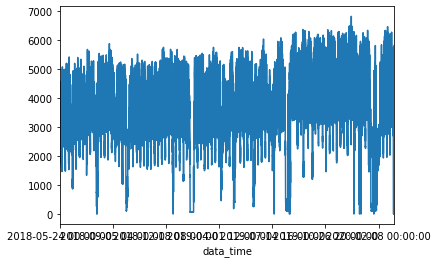

In [9]:
power[power.cid == "91E0B6DC00B91783E0530BC8100A0E30"].set_index("data_time").value.plot()

In [11]:
data = power[power.cid == "91E0B6DC00B91783E0530BC8100A0E30"].drop(["Unnamed: 0", "cid"], axis=1)

In [13]:
data['data_time'] = pd.to_datetime(data.data_time)

In [17]:
data = data.set_index("data_time").resample("15min").mean().reset_index()

In [25]:
data['is_null'] = data.value.isnull().astype("int")
data['is_zero'] = (data.value == 0).astype("int")

In [26]:
data.describe()

,value,is_null,is_zero
count,62976.000000,63168.000000,63168.000000
mean,3590.894272,0.003040,0.000142
std,1263.836364,0.055048,0.011936
min,0.000000,0.000000,0.000000
25%,3040.380000,0.000000,0.000000
50%,3785.879987,0.000000,0.000000
75%,4447.397500,0.000000,0.000000
max,6826.470000,1.000000,1.000000


In [32]:
data['value'] = np.log1p(data.value)

In [35]:
mu = data.value[:-1440].mean()
std = data.value[:-1440].std()

data['value'] = (data.value - mu) / std

In [36]:
data

,data_time,value,is_null,is_zero
0,2018-05-24 00:00:00,0.056481,0,0
1,2018-05-24 00:15:00,0.081105,0,0
2,2018-05-24 00:30:00,0.149026,0,0
3,2018-05-24 00:45:00,0.168729,0,0
4,2018-05-24 01:00:00,0.119331,0,0
...,...,...,...,...
63163,2020-03-11 22:45:00,0.539919,0,0
63164,2020-03-11 23:00:00,0.500894,0,0
63165,2020-03-11 23:15:00,0.471347,0,0
63166,2020-03-11 23:30:00,0.486844,0,0
